# Computational Physics PHYS-E0412 - Homework 4
Ari Viitala 
432568

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
%matplotlib inline

In [2]:
iterations = 100
m = []
N = 50
lat = np.random.randint(0, 2, (N, N)) * 2 - 1
p = 0
J = np.ones((N,N))
sng = np.ones((N,N))

for i in range(0, N):
    for j in range(0, N):
        if np.random.rand() < p:
            J[i, j] = -1

sng[::2, ::2] = -1
sng[1::2, 1::2] = -1

T = np.linspace(5, 0.1, iterations)

In [3]:
def H(i, j):
    u = j - 1 if j - 1 >= 0 else N - 1
    d = j + 1 if j + 1 < N else 0
    l = i - 1 if i - 1 >= 0 else N - 1
    r = i + 1 if i + 1 < N else  0

    e = lat[i, u] * J[i, u] + lat[r, j] * J[r, j] + lat[i, d] * J[i, d] + lat[l, j] * J[l, j] 

    return 2 * lat[i, j] * e

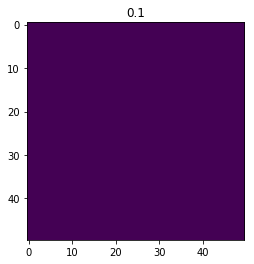

In [4]:
lat = np.random.randint(0, 2, (N, N)) * 2 - 1
m = [] 
ms = []
fig = plt.figure()
ax = fig.gca()
plt.show()
for k in range(0, iterations):
    clear_output(wait = True)
    #print(k)
    ax.imshow(lat)
    ax.set_title(T[k])
    fig.canvas.draw()
    fig.canvas.flush_events()
    display(fig)
    
    for i in range(0, N):
        for j in range(0, N):
            energy = H(i, j)
            lat[i, j] *= -1
            de = H(i, j) - energy
            if np.random.random() > np.exp(de / T[k]):
                lat[i, j] *= -1
    m.append(1 / N**2 * abs(np.sum(lat)))
    ms.append(1 / N**2 * abs(np.sum(lat * sng)))

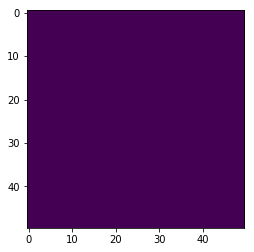

In [5]:
plt.imshow(J)

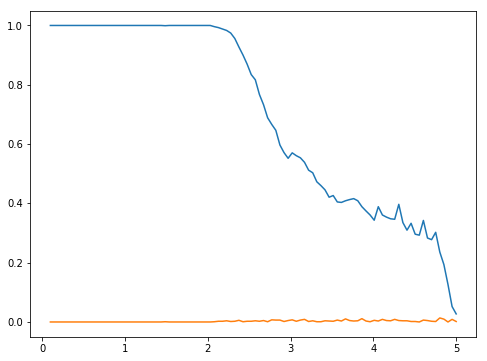

In [6]:
plt.figure(1, (8, 6))
plt.plot(T,m)
plt.plot(T, ms)
plt.show()

In [7]:
def H2(i, j, J, lat):
    u = j - 1 if j - 1 >= 0 else N - 1
    d = j + 1 if j + 1 < N else 0
    l = i - 1 if i - 1 >= 0 else N - 1
    r = i + 1 if i + 1 < N else  0

    e = lat[i, u] * J[i, u] + lat[r, j] * J[r, j] + lat[i, d] * J[i, d] + lat[l, j] * J[l, j] 

    return 2* lat[i, j] * e

In [31]:
def anneal(p, N, iters, Th, Tl):
    lat = np.ones((N,N))
    J = np.ones((N,N))
    sng = np.ones((N,N))

    for i in range(0, N):
        for j in range(0, N):
            if np.random.rand() < p:
                J[i, j] = -1

    sng[::2, ::2] = -1
    sng[1::2, 1::2] = -1

    T = np.linspace(Th, Tl, iters)
    
    lat = np.random.randint(0, 2, (N, N)) * 2 - 1
    m = np.zeros(iters) 
    ms = np.zeros(iters)
    for k in range(0, iters):
        #clear_output(wait = True)
        #print(k)

        for i in range(0, N):
            for j in range(0, N):
                energy = H2(i, j, J, lat)
                de = -2 * energy
                if np.random.random() < np.exp(de / T[k]):
                    lat[i, j] *= -1
        m[k] = (1 / N**2 * abs(np.sum(lat)))
        ms[k] = (1 / N**2 * abs(np.sum(lat * sng)))
        
    return m, ms, lat

In [32]:
m, ms, lat = anneal(1, 50, 200, 5, 0.1)

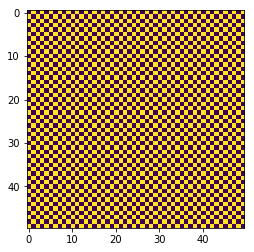

In [33]:
plt.imshow(lat)

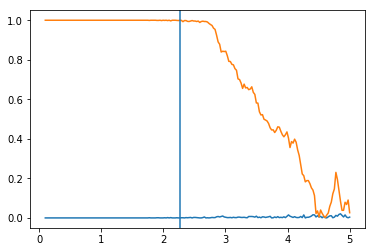

In [34]:
T = np.linspace(5, 0.1, 200)
plt.plot(T,m)
plt.plot(T,ms)
plt.axvline(2.27)

In [26]:
n_p = 10
p_iters = 30
N = 50
iters = 200
Th = 4
Tl = 0.1

ps = np.linspace(0,0.2, n_p)
m = np.zeros((iters, n_p))
ms = np.zeros((iters, n_p))
for i in range(0, n_p):
    for k in range(0, p_iters):
        print(k)
        temp_m, temp_ms, lat = anneal(ps[i], N, iters, Th, Tl)
        m[:, i] += temp_m
        ms[:, i] += temp_ms
    m[:, i] /= p_iters
    ms[:, i] /= p_iters
    clear_output(wait = True)    
    print("P: "  + str(ps[i]))
    print("Magnetization: " + str(np.mean(m[-1,i])))
    print("Swagger: " + str(np.mean(ms[-1,i])))
    
    

P: 0.2
Magnetization: 0.0578933333333
Swagger: 0.0133066666667


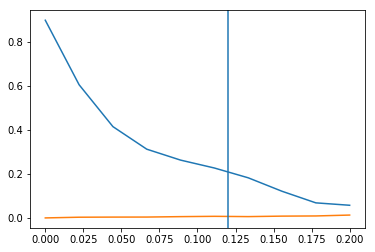

In [27]:
plt.plot(ps, m[-1:,:].mean(axis = 0))
plt.plot(ps, ms[-1:,:].mean(axis = 0))
plt.axvline(0.12)

In [456]:
100 / 25 

4.0

In [460]:
np.linspace(0, 1, 50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])